In [1]:
import yaml

with open('../config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
train_df = pd.read_csv(cfg['house_pricing']['train_dataset'])
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df = pd.read_csv(cfg['house_pricing']['test_dataset'])
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Пропущенные значения в train (доля пропусков):
LotFrontage     0.178938
Alley           0.939212
MasVnrType      0.594178
MasVnrArea      0.006849
BsmtQual        0.022260
BsmtCond        0.022260
BsmtExposure    0.023116
BsmtFinType1    0.022260
BsmtFinType2    0.023116
Electrical      0.000856
FireplaceQu     0.468322
GarageType      0.056507
GarageYrBlt     0.056507
GarageFinish    0.056507
GarageQual      0.056507
GarageCond      0.056507
PoolQC          0.994007
Fence           0.816781
MiscFeature     0.963185
dtype: float64
Пропущенные значения в test (доля пропусков):
LotFrontage     0.171233
Alley           0.931507
MasVnrType      0.609589
BsmtQual        0.037671
BsmtCond        0.037671
BsmtExposure    0.037671
BsmtFinType1    0.037671
BsmtFinType2    0.037671
FireplaceQu     0.489726
GarageType      0.051370
GarageYrBlt     0.051370
GarageFinish    0.051370
GarageQual      0.051370
GarageCond      0.051370
PoolQC          1.000000
Fence           0.770548
MiscFeature     0

C:\Users\Faste\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Multicollinearity analysis:
        Feature           VIF
36     1stFlrSF           inf
37     2ndFlrSF           inf
38    GrLivArea           inf
31  TotalBsmtSF  1.310375e+04
30    BsmtUnfSF  1.011271e+04
..          ...           ...
5        Street  1.237273e+00
11   Condition1  1.219159e+00
58       YrSold  1.167706e+00
57       MoSold  1.153362e+00
0            Id  1.131011e+00

[61 rows x 2 columns]
Пропущенные значения в train (доля пропусков):
LotFrontage     0.178938
Alley           0.939212
MasVnrType      0.594178
MasVnrArea      0.006849
BsmtQual        0.022260
BsmtCond        0.022260
BsmtExposure    0.023116
BsmtFinType1    0.022260
BsmtFinType2    0.023116
Electrical      0.000856
FireplaceQu     0.468322
GarageType      0.056507
GarageYrBlt     0.056507
GarageFinish    0.056507
GarageQual      0.056507
GarageCond      0.056507
PoolQC          0.994007
Fence           0.816781
MiscFeature     0.963185
dtype: float64
Пропущенные значения в test (доля пропусков):
LotFro

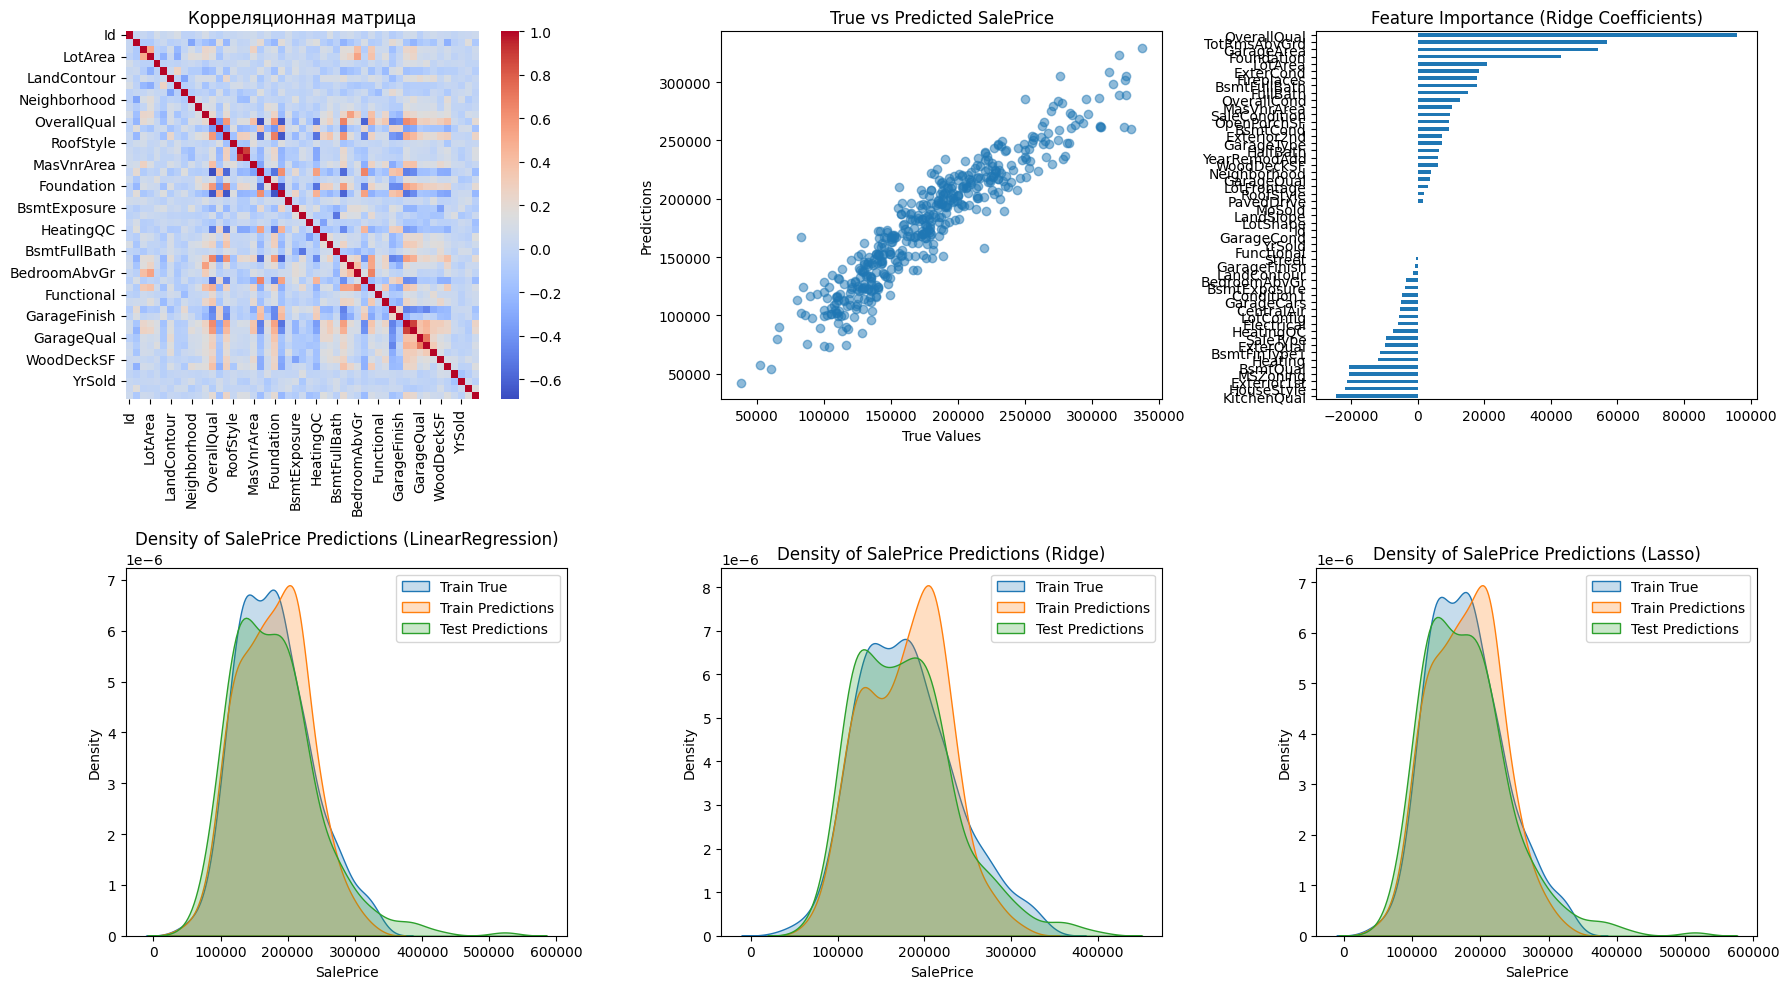

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Загрузка данных
train_df = pd.read_csv('train_hw.csv')
test_df = pd.read_csv('test_hw.csv')

# Проверка пропущенных значений
missing_train = train_df.isnull().mean()
missing_test = test_df.isnull().mean()

print("Пропущенные значения в train (доля пропусков):")
print(missing_train[missing_train > 0])
print("Пропущенные значения в test (доля пропусков):")
print(missing_test[missing_test > 0])

#Удаление признаков с более чем 30% пропущенных значений
threshold = 0.3
high_missing_cols = missing_train[missing_train > threshold].index
train_df.drop(columns=high_missing_cols, inplace=True)
test_df.drop(columns=high_missing_cols, inplace=True)

# Разделение на числовые и категориальные признаки
num_cols = train_df.select_dtypes(exclude=['object']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns
test_num_cols = test_df.select_dtypes(exclude=['object']).columns

# Заполнение пропусков
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[test_num_cols] = test_df[test_num_cols].fillna(test_df[test_num_cols].median())

train_df[cat_cols] = train_df[cat_cols].fillna('Missing')
test_df[cat_cols] = test_df[cat_cols].fillna('Missing')

# Удаление на основе межквартильного размаха (IQR)
Q1 = train_df[num_cols].quantile(0.25)
Q3 = train_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df[num_cols] < (Q1 - 1.5 * IQR)) | (train_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Кодирование категориальных признаков
for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train_df[col], test_df[col]], axis=0))
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Разделение данных
X_train = train_df.drop(columns=['SalePrice'])
y_train = train_df['SalePrice']
X_test = test_df.drop(columns=['SalePrice'], errors='ignore')

# Исключение констаных признаков
constant_cols = X_train.columns[X_train.nunique() == 1]
print("Константные признаки после удаления выбросов:", constant_cols.tolist())
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)

# Масштабирование
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

# Анализ мультиколлинеарности
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range(X_train.shape[1])]

print("Multicollinearity analysis:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Исключение признаков с VIF > 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
X_train.drop(columns=high_vif_features, inplace=True)
X_test.drop(columns=high_vif_features, inplace=True, errors='ignore')

# Графики
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Корреляционная матрица
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False, ax=axes[0, 0])
axes[0, 0].set_title('Корреляционная матрица')

print("Пропущенные значения в train (доля пропусков):")
print(missing_train[missing_train > 0])
print("Пропущенные значения в test (доля пропусков):")
print(missing_test[missing_test > 0])

# Обучение моделей
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=10)
}

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f'RMSE ({name}) на тренировочном наборе: {train_rmse}')

    # KDE-график распределения предсказаний
    sns.kdeplot(y_train, label='Train True', fill=True, ax=axes[1, i])
    sns.kdeplot(y_train_pred, label='Train Predictions', fill=True, ax=axes[1, i])
    sns.kdeplot(y_test_pred, label='Test Predictions', fill=True, ax=axes[1, i])
    axes[1, i].set_title(f'Density of SalePrice Predictions ({name})')
    axes[1, i].legend()

    if name == "Lasso":
        # True vs Predicted
        axes[0, 1].scatter(y_train, y_train_pred, alpha=0.5)
        axes[0, 1].set_xlabel('True Values')
        axes[0, 1].set_ylabel('Predictions')
        axes[0, 1].set_title('True vs Predicted SalePrice')

        # Важность признаков
        feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values()
        feature_importance.plot(kind='barh', ax=axes[0, 2])
        axes[0, 2].set_title('Feature Importance (Ridge Coefficients)')

        # Сохранение предсказаний
        submission = pd.DataFrame({
            'Id': test_df['Id'],
            'SalePrice': y_test_pred
        })
        submission.to_csv('submission.csv', index=False)

plt.tight_layout()
plt.show()


Пропущенные значения в train (доля пропусков):
LotFrontage     0.178938
Alley           0.939212
MasVnrType      0.594178
MasVnrArea      0.006849
BsmtQual        0.022260
BsmtCond        0.022260
BsmtExposure    0.023116
BsmtFinType1    0.022260
BsmtFinType2    0.023116
Electrical      0.000856
FireplaceQu     0.468322
GarageType      0.056507
GarageYrBlt     0.056507
GarageFinish    0.056507
GarageQual      0.056507
GarageCond      0.056507
PoolQC          0.994007
Fence           0.816781
MiscFeature     0.963185
dtype: float64
Пропущенные значения в test (доля пропусков):
LotFrontage     0.171233
Alley           0.931507
MasVnrType      0.609589
BsmtQual        0.037671
BsmtCond        0.037671
BsmtExposure    0.037671
BsmtFinType1    0.037671
BsmtFinType2    0.037671
FireplaceQu     0.489726
GarageType      0.051370
GarageYrBlt     0.051370
GarageFinish    0.051370
GarageQual      0.051370
GarageCond      0.051370
PoolQC          1.000000
Fence           0.770548
MiscFeature     0

c:\Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.873e+10, tolerance: 1.371e+08
  model = cd_fast.enet_coordinate_descent(


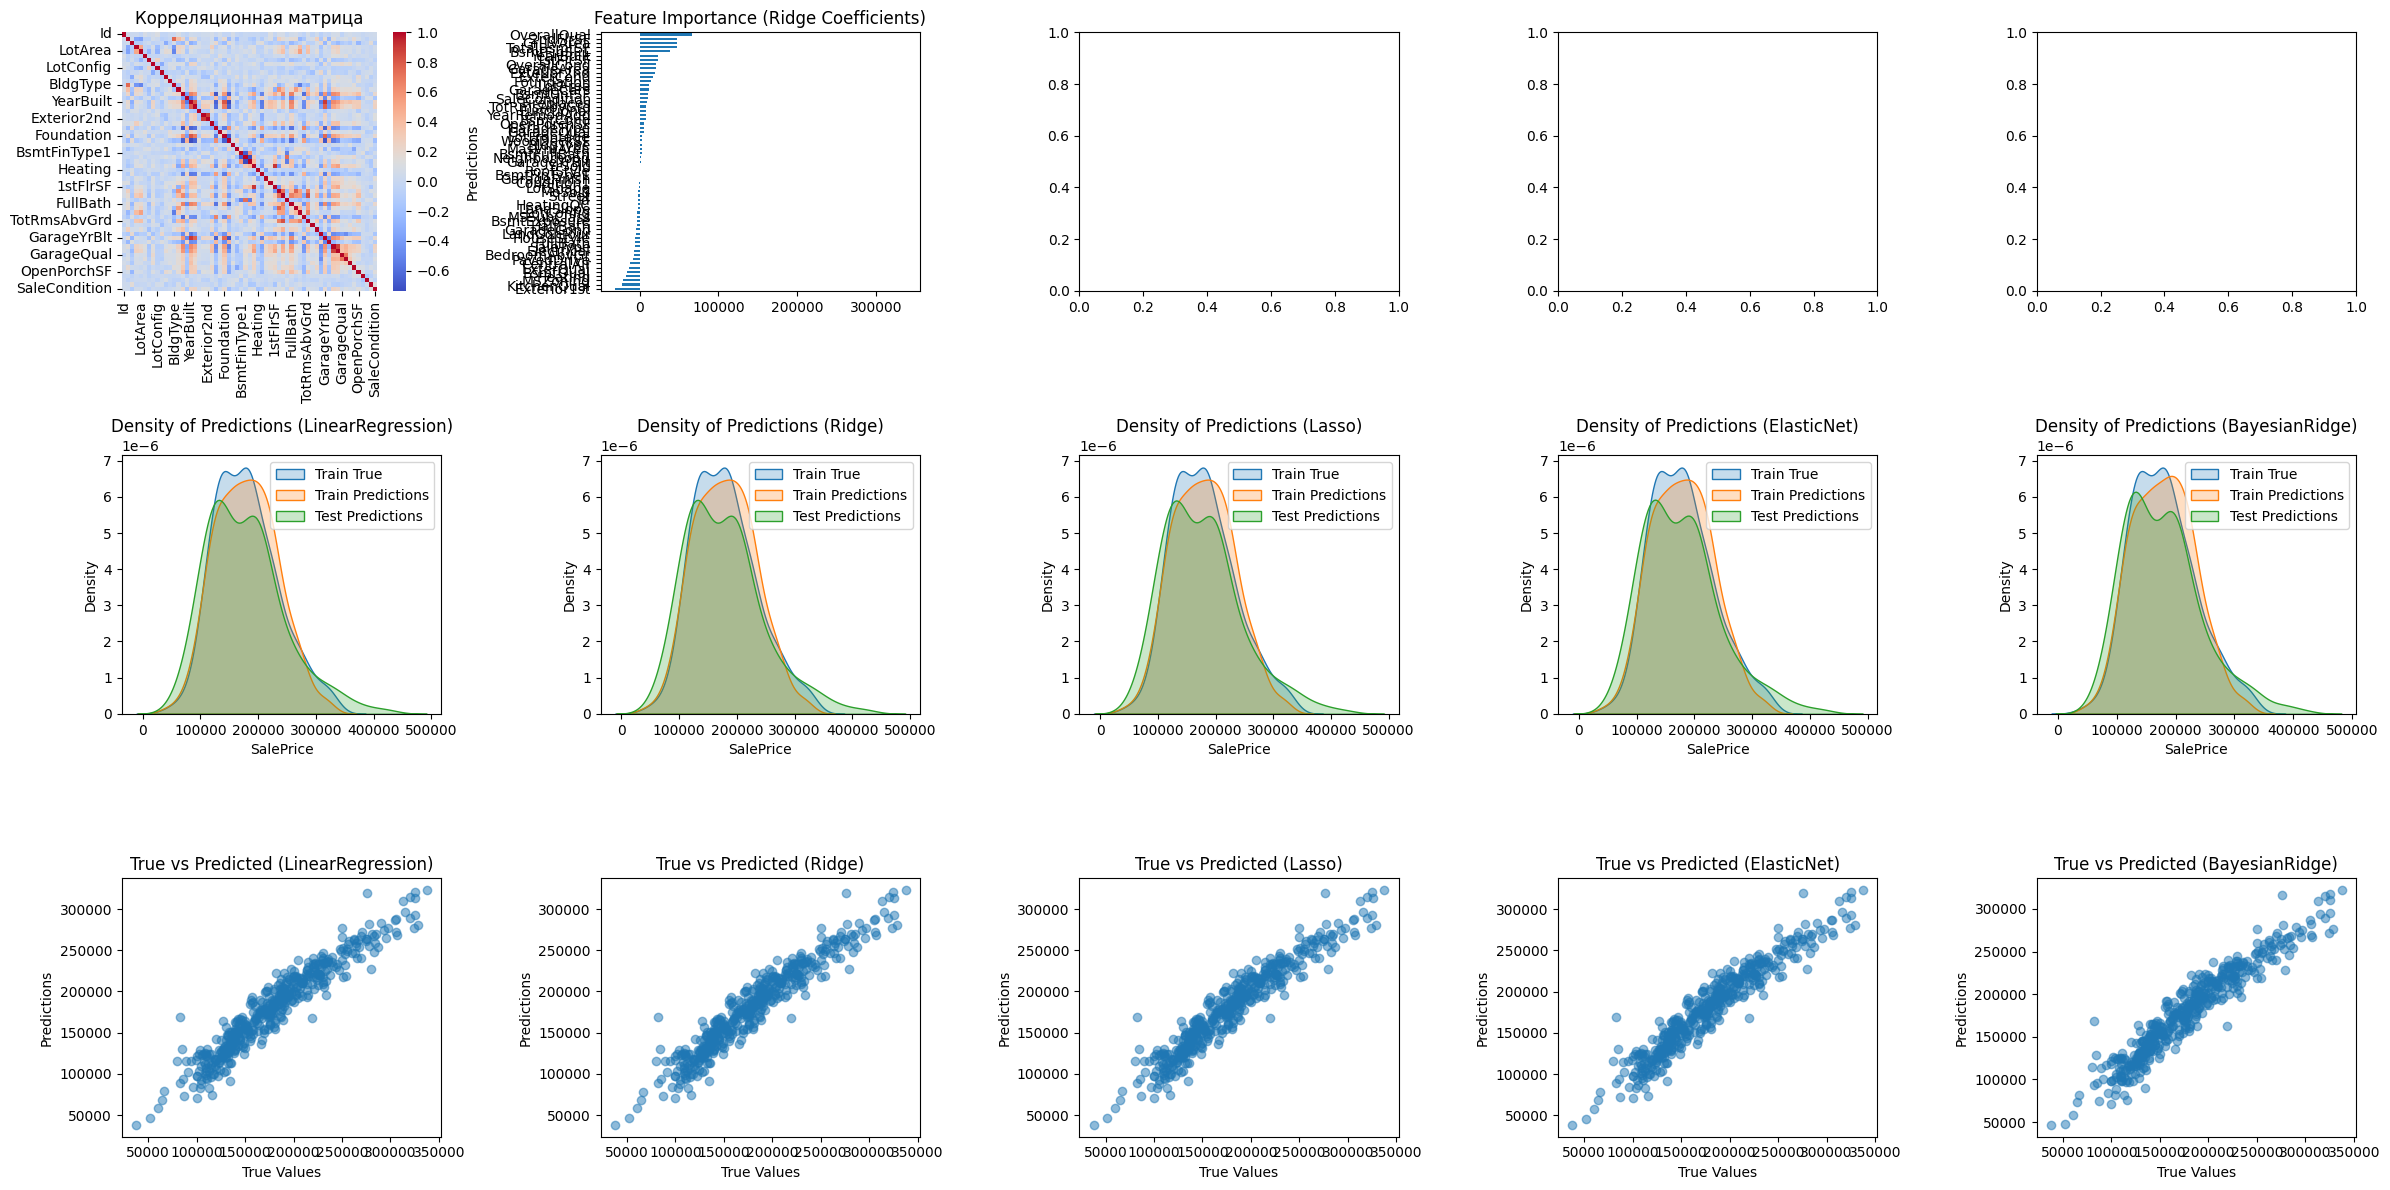

Лучшая модель: LinearRegression с RMSE 16192.69
Файл submission.csv сохранён.


In [ ]:
# V2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Загрузка данных
train_df = pd.read_csv('train_hw.csv')
test_df = pd.read_csv('test_hw.csv')

# Проверка пропущенных значений
missing_train = train_df.isnull().mean()
missing_test = test_df.isnull().mean()

print("Пропущенные значения в train (доля пропусков):")
print(missing_train[missing_train > 0])
print("Пропущенные значения в test (доля пропусков):")
print(missing_test[missing_test > 0])

#Удаление признаков с более чем 30% пропущенных значений
threshold = 0.3
high_missing_cols = missing_train[missing_train > threshold].index
train_df.drop(columns=high_missing_cols, inplace=True)
test_df.drop(columns=high_missing_cols, inplace=True)

# Разделение на числовые и категориальные признаки
num_cols = train_df.select_dtypes(exclude=['object']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns
test_num_cols = test_df.select_dtypes(exclude=['object']).columns

# Заполнение пропусков
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[test_num_cols] = test_df[test_num_cols].fillna(test_df[test_num_cols].median())

train_df[cat_cols] = train_df[cat_cols].fillna('Missing')
test_df[cat_cols] = test_df[cat_cols].fillna('Missing')

# Удаление на основе межквартильного размаха (IQR)
Q1 = train_df[num_cols].quantile(0.25)
Q3 = train_df[num_cols].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df[num_cols] < (Q1 - 1.5 * IQR)) | (train_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Кодирование категориальных признаков
for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train_df[col], test_df[col]], axis=0))
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Разделение данных
X_train = train_df.drop(columns=['SalePrice'])
y_train = train_df['SalePrice']
X_test = test_df.drop(columns=['SalePrice'], errors='ignore')

# Исключение констаных признаков
constant_cols = X_train.columns[X_train.nunique() == 1]
print("Константные признаки после удаления выбросов:", constant_cols.tolist())
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)

# Масштабирование
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])


# Графики
fig, axes = plt.subplots(3, 5, figsize=(24, 12))

# Корреляционная матрица
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False, ax=axes[0, 0])
axes[0, 0].set_title('Корреляционная матрица')

# Обучение моделей
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=0.0005),
    "Lasso": Lasso(alpha=0.0005),
    "ElasticNet": ElasticNet(alpha=0.0005, l1_ratio=0.9),
    "BayesianRidge": BayesianRidge()
}


results = {}
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    log_rmse = np.log1p(train_rmse)
    results[name] = train_rmse

    print(f'RMSE ({name}) на тренировочном наборе: {train_rmse:.2f} (log: {log_rmse:.2f})')

    # График распределения предсказаний
    sns.kdeplot(y_train, label='Train True', fill=True, ax=axes[1, i])
    sns.kdeplot(y_train_pred, label='Train Predictions', fill=True, ax=axes[1, i])
    sns.kdeplot(y_test_pred, label='Test Predictions', fill=True, ax=axes[1, i])
    axes[1, i].set_title(f'Density of Predictions ({name})')
    axes[1, i].legend()

    # True vs Predicted
    axes[2, i].scatter(y_train, y_train_pred, alpha=0.5)
    axes[2, i].set_xlabel('True Values')
    axes[2, i].set_ylabel('Predictions')
    axes[2, i].set_title(f'True vs Predicted ({name})')

    if name == "LinearRegression":
        # True vs Predicted
        axes[0, 1].scatter(y_train, y_train_pred, alpha=0.5)
        axes[0, 1].set_xlabel('True Values')
        axes[0, 1].set_ylabel('Predictions')
        axes[0, 1].set_title('True vs Predicted SalePrice')

        # Важность признаков
        feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values()
        feature_importance.plot(kind='barh', ax=axes[0, 1])
        axes[0, 1].set_title('Feature Importance (Ridge Coefficients)')

plt.tight_layout()
plt.show()

best_model = min(results, key=results.get)
print(f"Лучшая модель: {best_model} с RMSE {results[best_model]:.2f}")

final_model = models[best_model]
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)

# Сохранение предсказаний
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("Файл submission.csv сохранён.")


In [ ]:
# V3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from xgboost import XGBRegressor
from scipy.stats import skew

train = pd.read_csv('train_hw.csv')
test = pd.read_csv('test_hw.csv')

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

train["SalePrice"] = np.log1p(train["SalePrice"])

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

all_data = pd.get_dummies(all_data)
print(all_data.shape)

train = all_data[:ntrain]
test = all_data[ntrain:]

def rmsle_cv(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

models = {
    "Linear Regression": make_pipeline(RobustScaler(), LinearRegression()),
    "Lasso Regression": make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=42)),
    # "Elastic Net": make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=42)),
    # "Ridge Regression": Ridge(alpha=0.0005, random_state=42),
    # "XGBoost Regressor": XGBRegressor()
}
results = {}

for name, model in models.items():
    score = rmsle_cv(model)
    print(f"\n{name} score: {score.mean():.4f} ({score.std():.4f})\n")

fig, axes = plt.subplots(3, len(models), figsize=(20, 10))
fig.suptitle('Model Performance')

for i, (name, model) in enumerate(models.items()):
    model.fit(train.values, y_train)
    y_train_pred = model.predict(train.values)
    y_test_pred = model.predict(test.values)

    y_train_pred_exp = np.expm1(y_train_pred)
    y_train_exp = np.expm1(y_train)
    y_test_pred_exp = np.expm1(y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train_exp, y_train_pred_exp))
    log_rmse = np.log1p(train_rmse)
    results[name] = train_rmse
    print(f'RMSE ({name}) на тренировочном наборе: {train_rmse:.2f} (log: {log_rmse:.2f})')

    sns.kdeplot(y_train_exp, label='Train True', fill=True, ax=axes[1, i])
    sns.kdeplot(y_train_pred_exp, label='Train Predictions', fill=True, ax=axes[1, i])
    sns.kdeplot(y_test_pred_exp, label='Test Predictions', fill=True, ax=axes[1, i])
    axes[1, i].set_title(f'Density of Predictions ({name})')
    axes[1, i].legend()

    axes[2, i].scatter(y_train, y_train_pred, alpha=0.5)
    axes[2, i].set_xlabel('True Values')
    axes[2, i].set_ylabel('Predictions')
    axes[2, i].set_title(f'True vs Predicted ({name})')

for i, (name, score) in enumerate(results.items()):
    axes[0, i].bar(name, score, color='blue')
    axes[0, i].set_title(f'RMSE: {score:.2f}')
    axes[0, i].set_ylim(0, max(results.values()) * 1.2)

plt.tight_layout()
plt.show()

best_model_name = min(results, key=results.get)
final_model = models[best_model_name].fit(train.values, y_train)
y_test_pred_final = np.expm1(final_model.predict(test.values))

submission = pd.DataFrame({
    'Id': test_ID,
    'SalePrice': y_test_pred_final
})
submission.to_csv('submission.csv', index=False)

print(f"Лучший алгоритм: {best_model_name} с RMSE {results[best_model_name]:.2f}")
print("Файл submission.csv сохранён!")